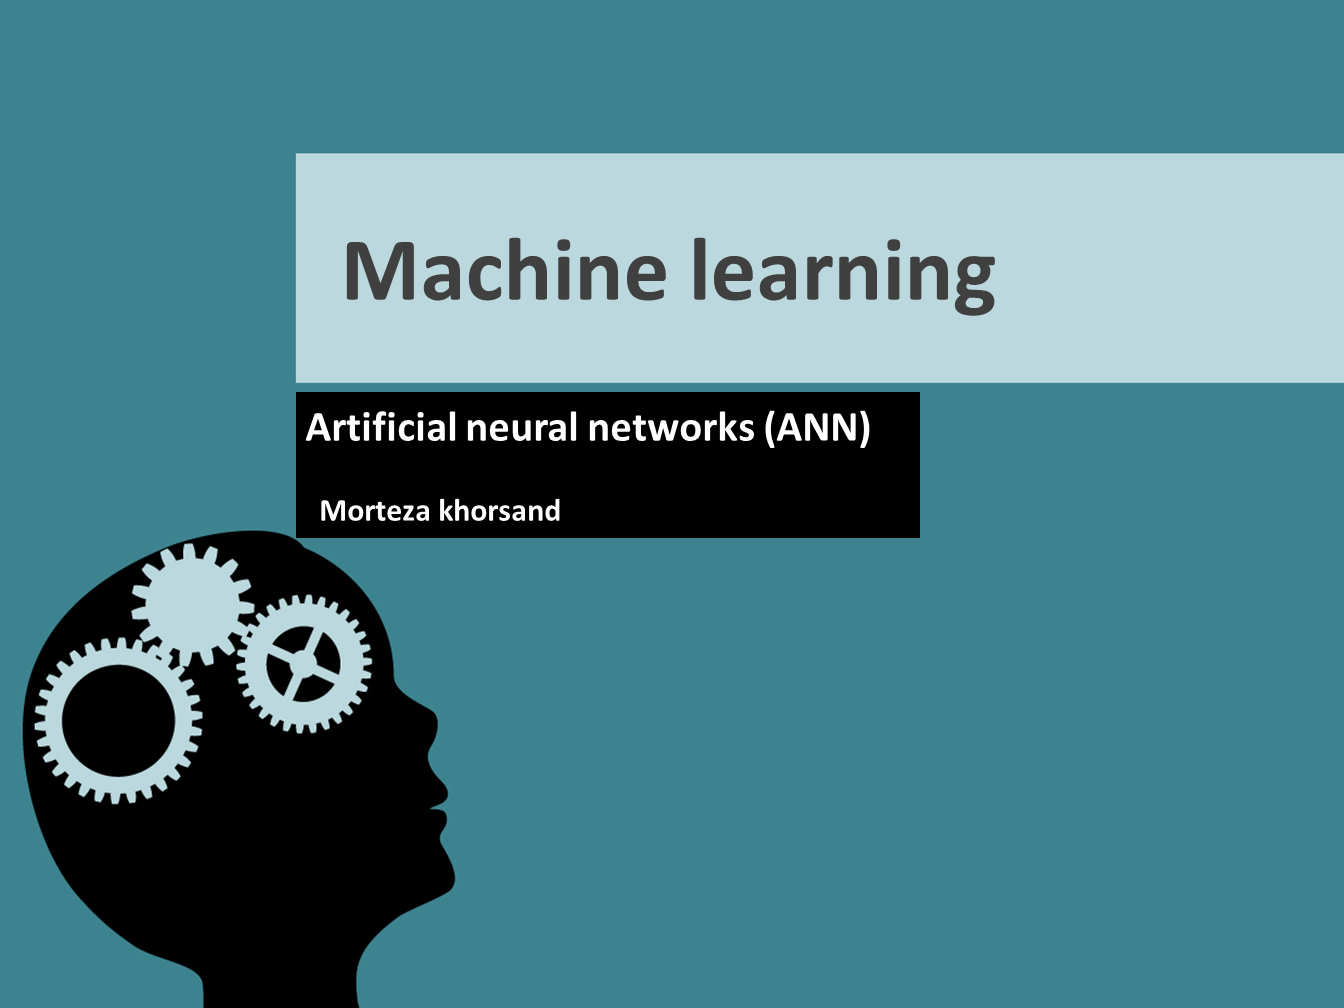

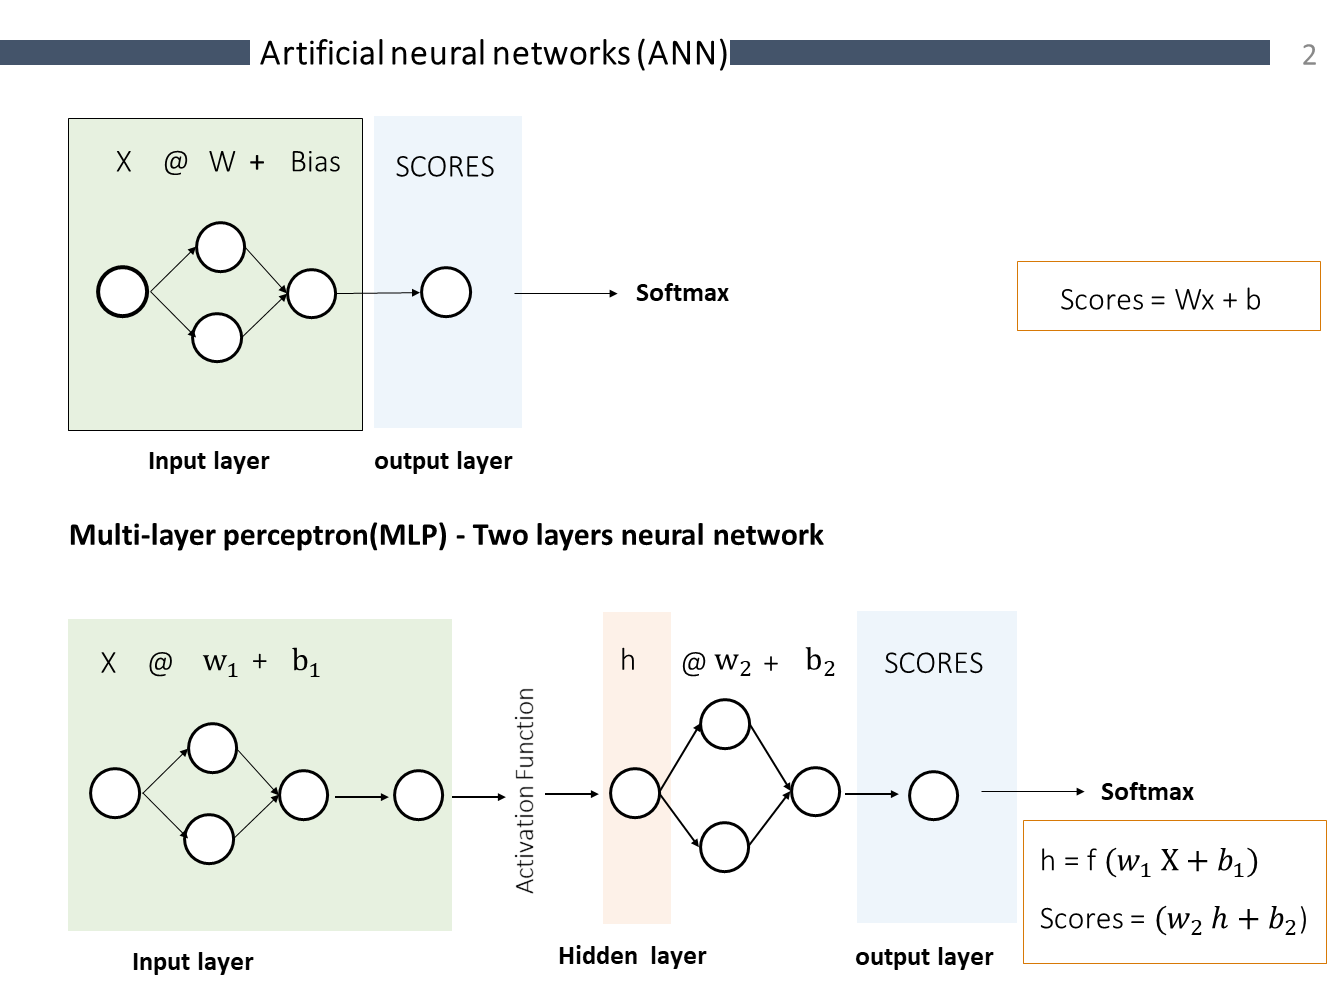

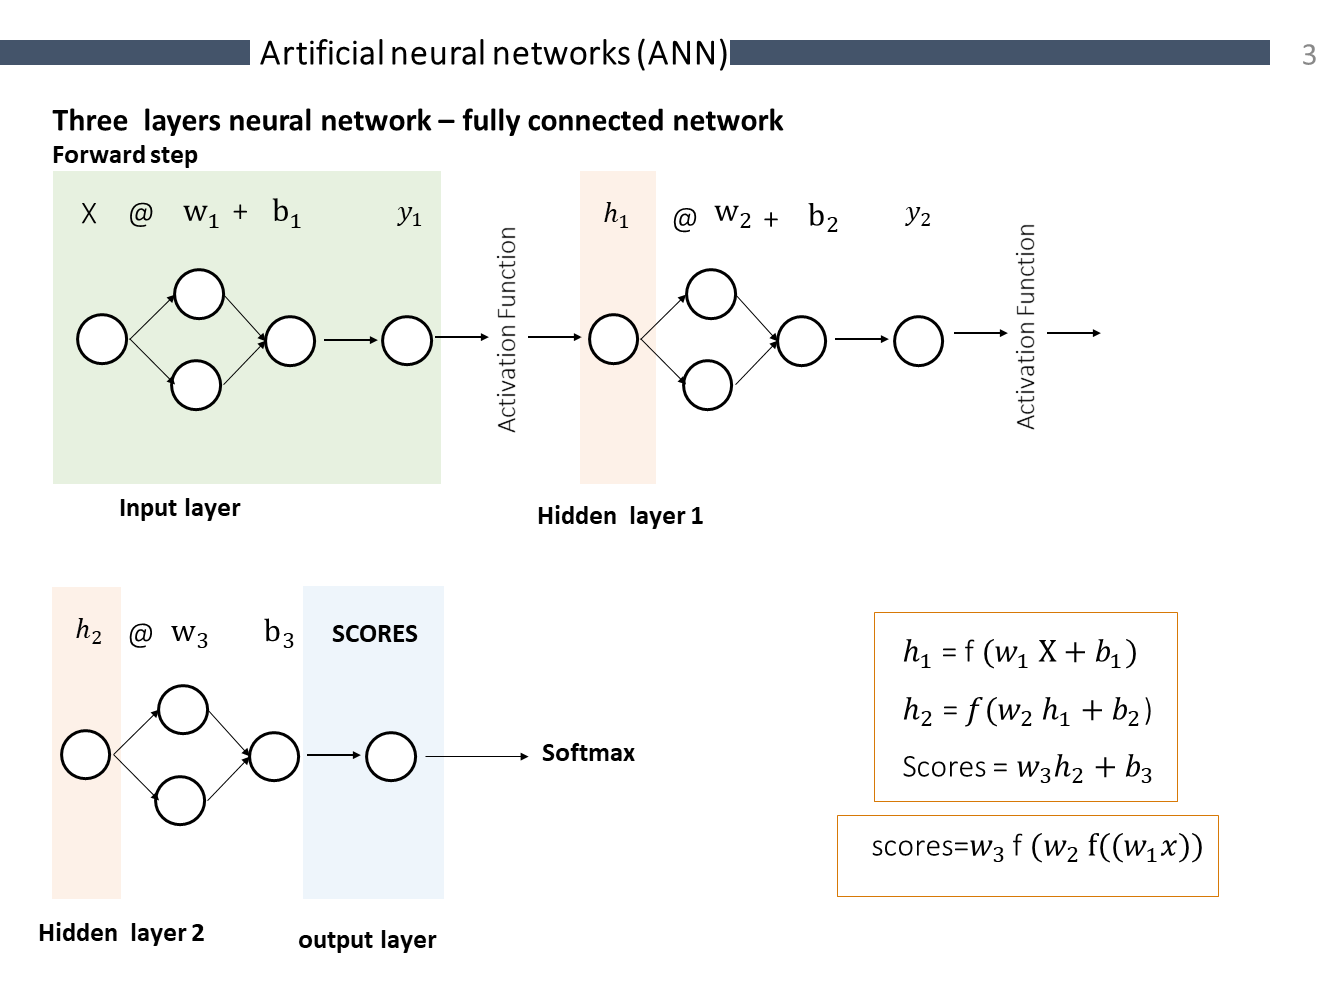

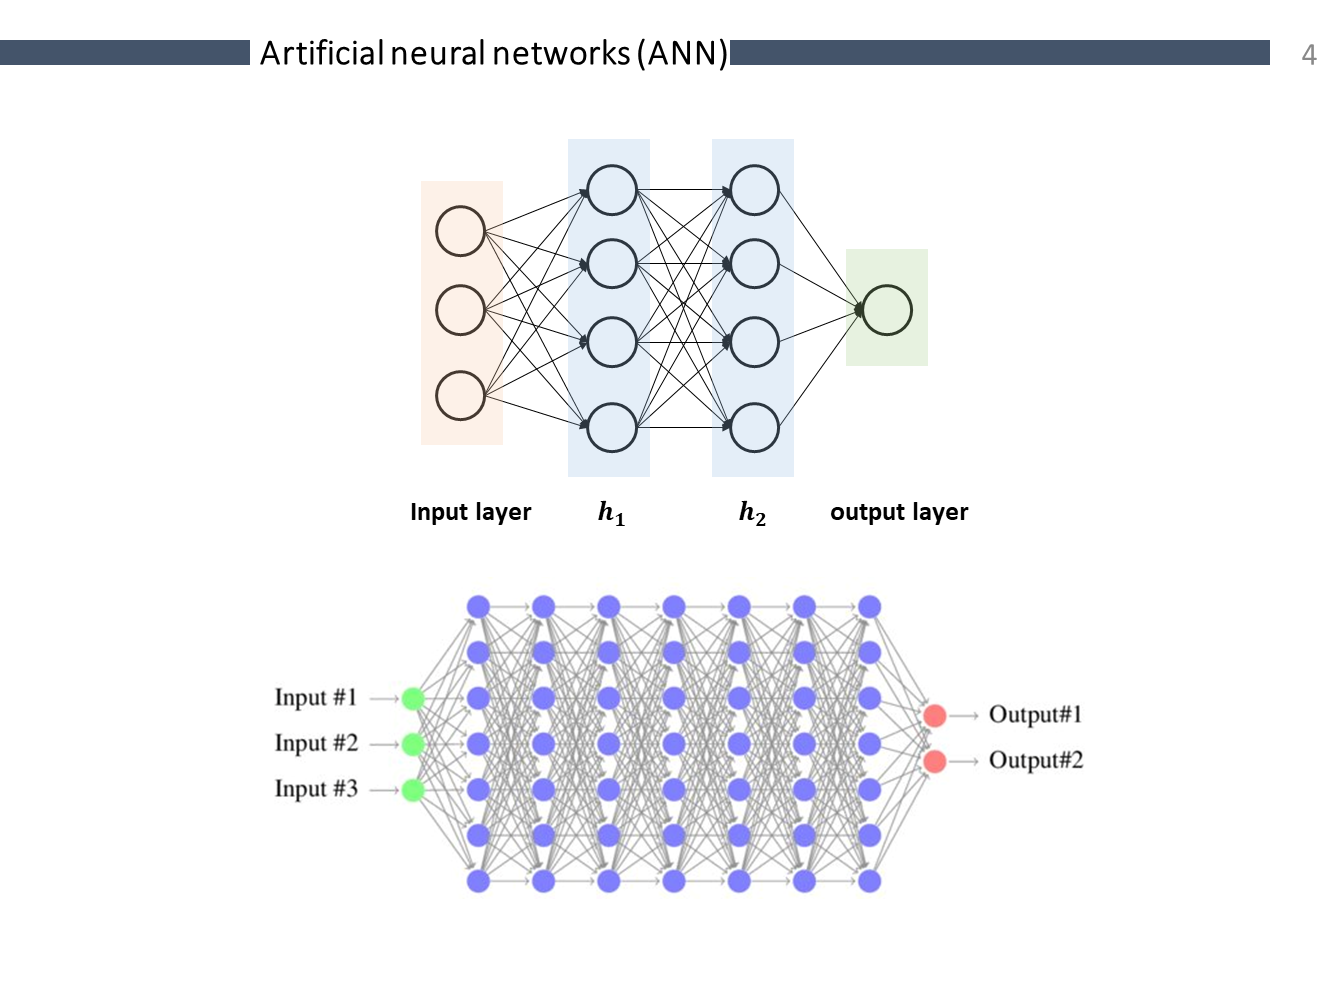

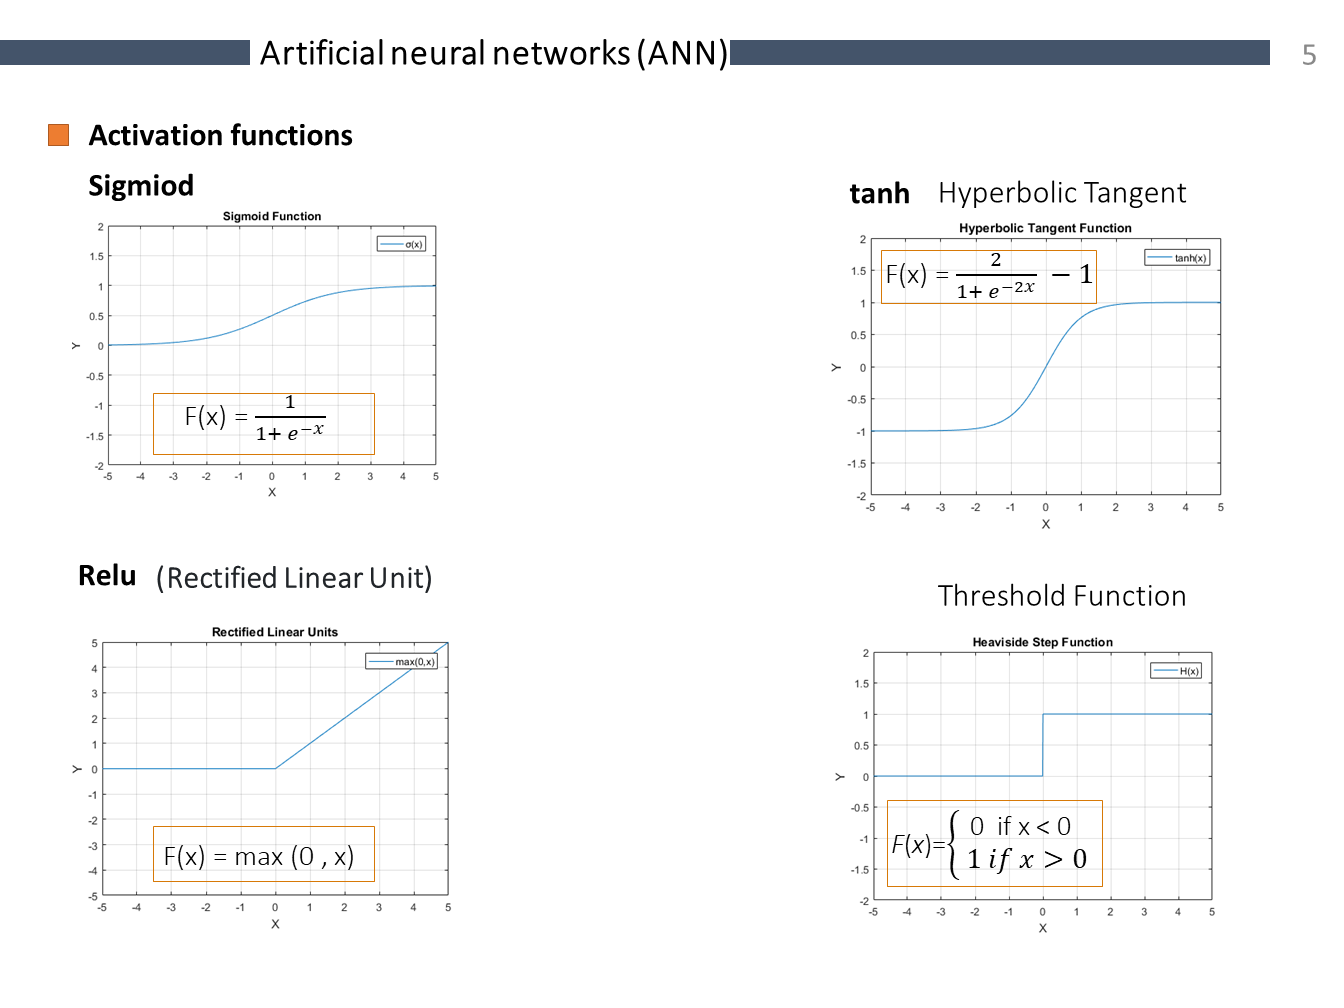

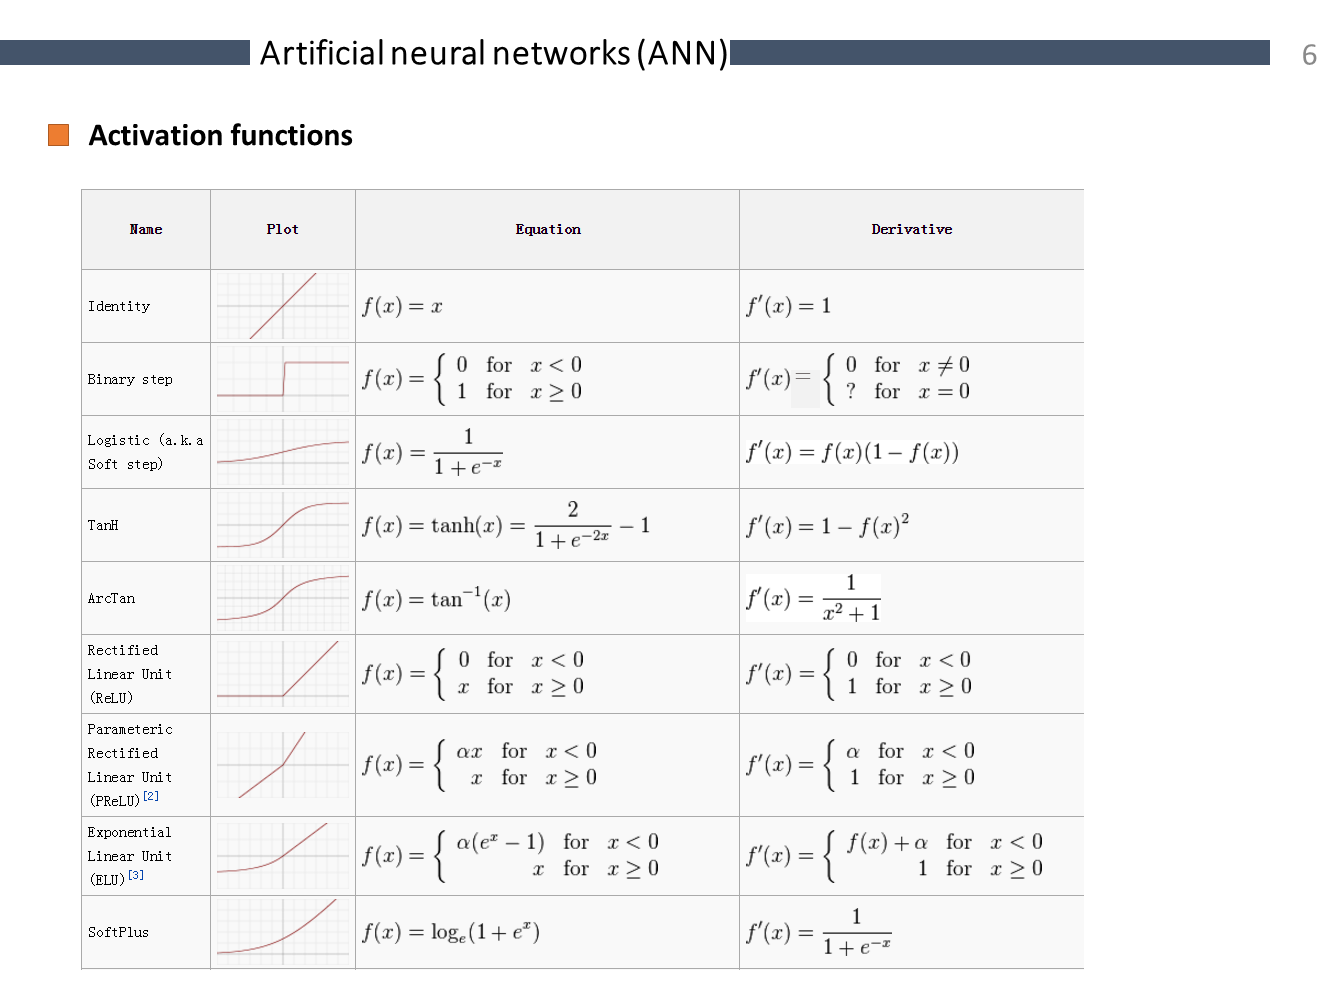

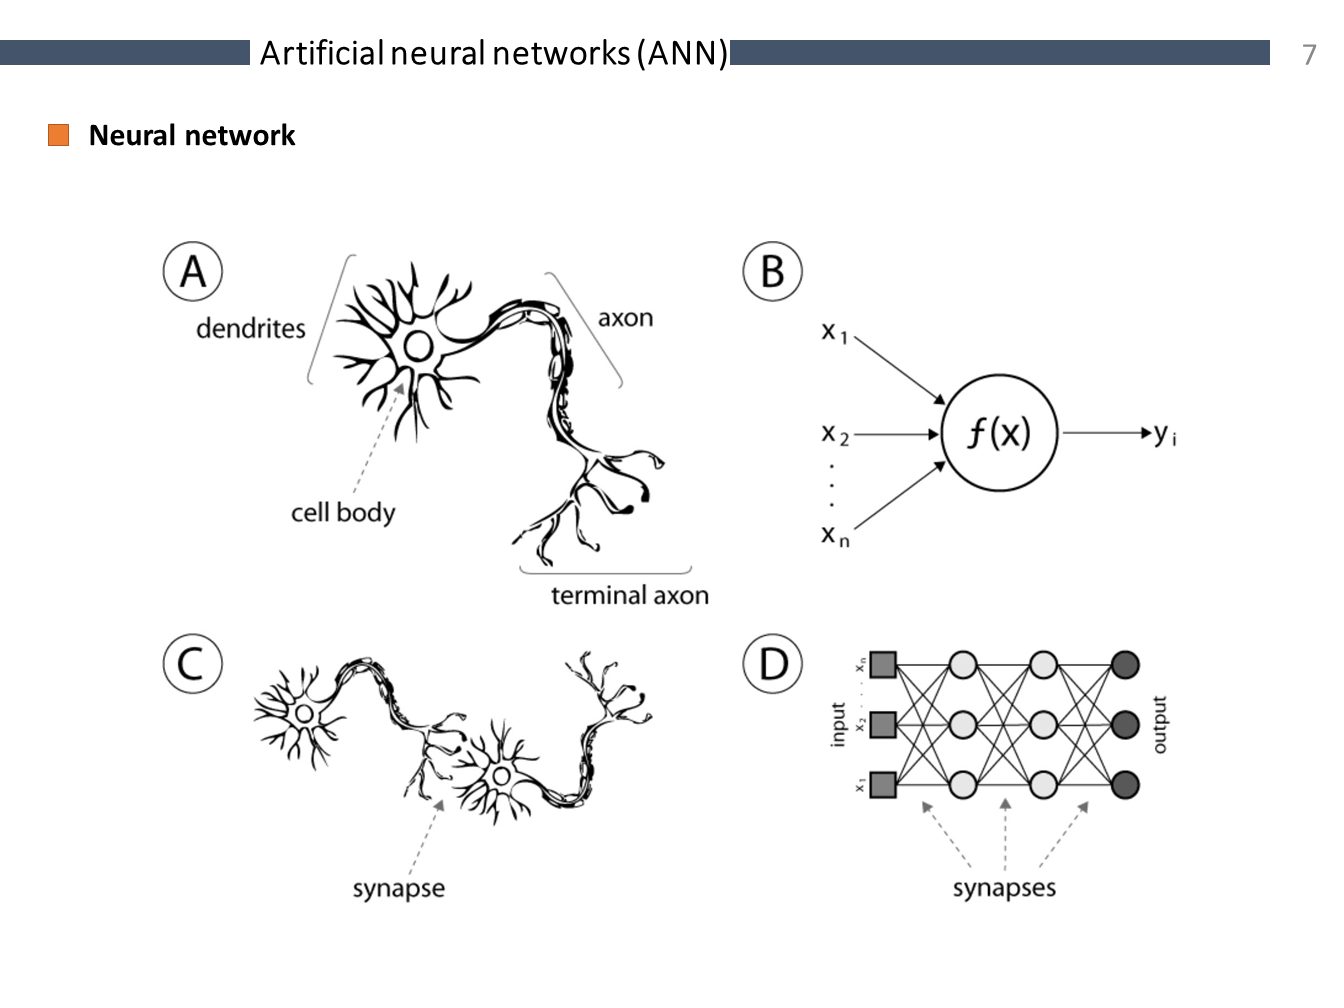

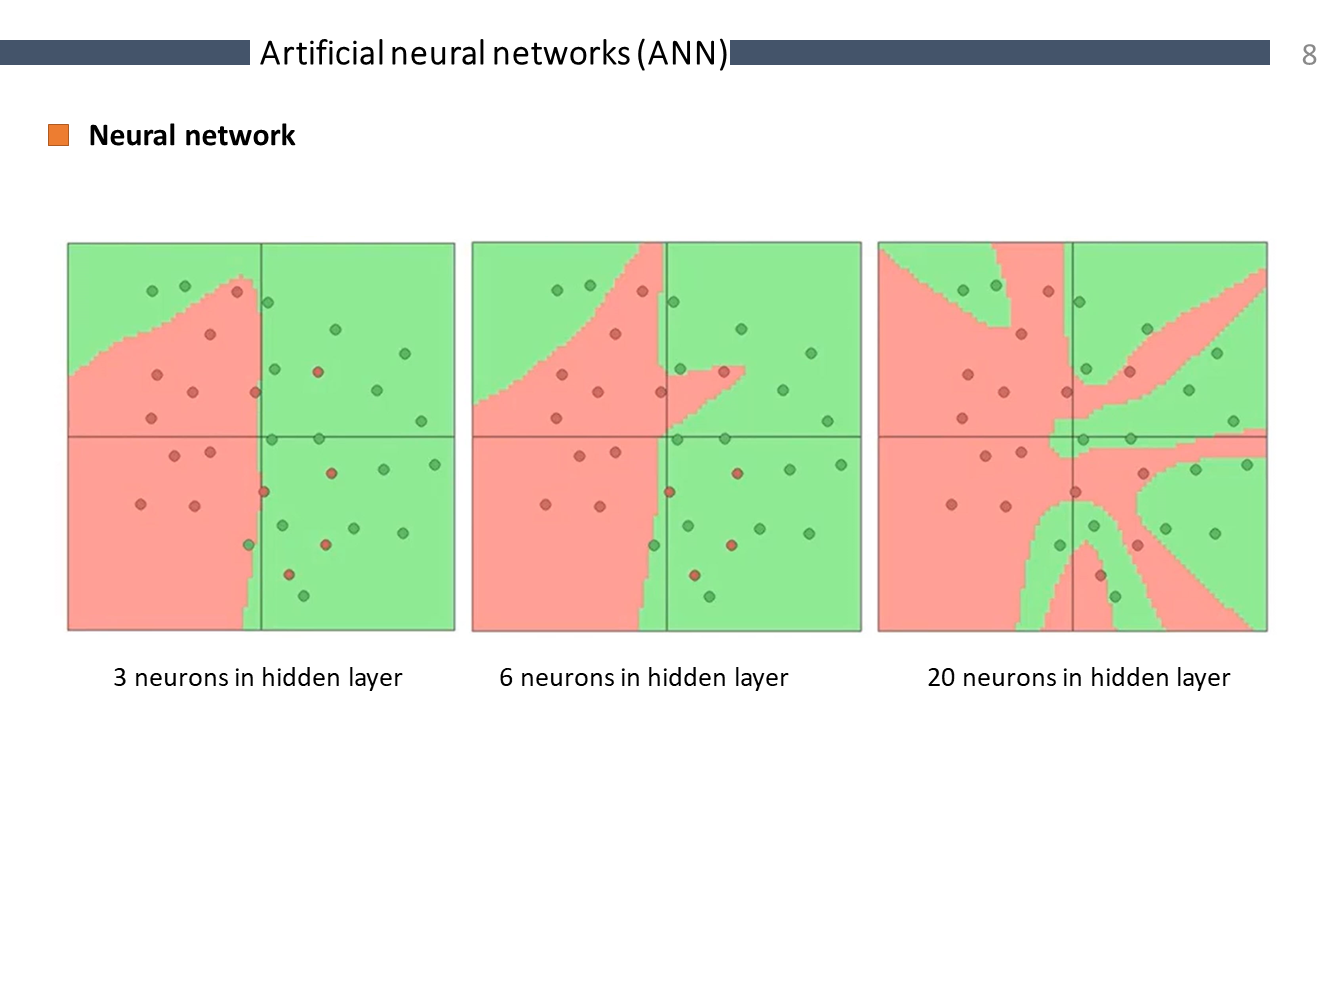

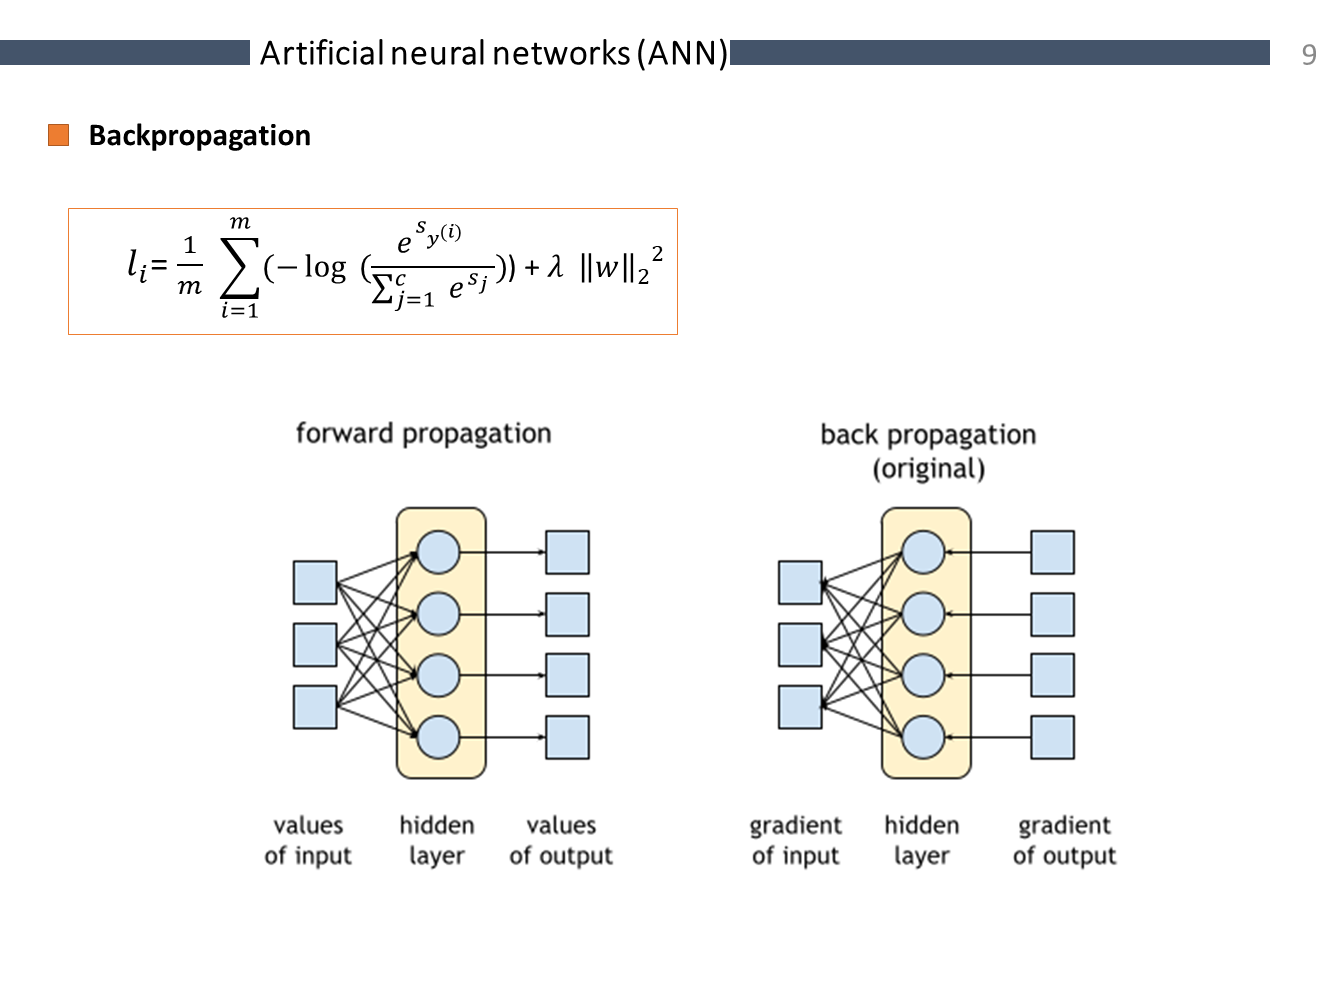

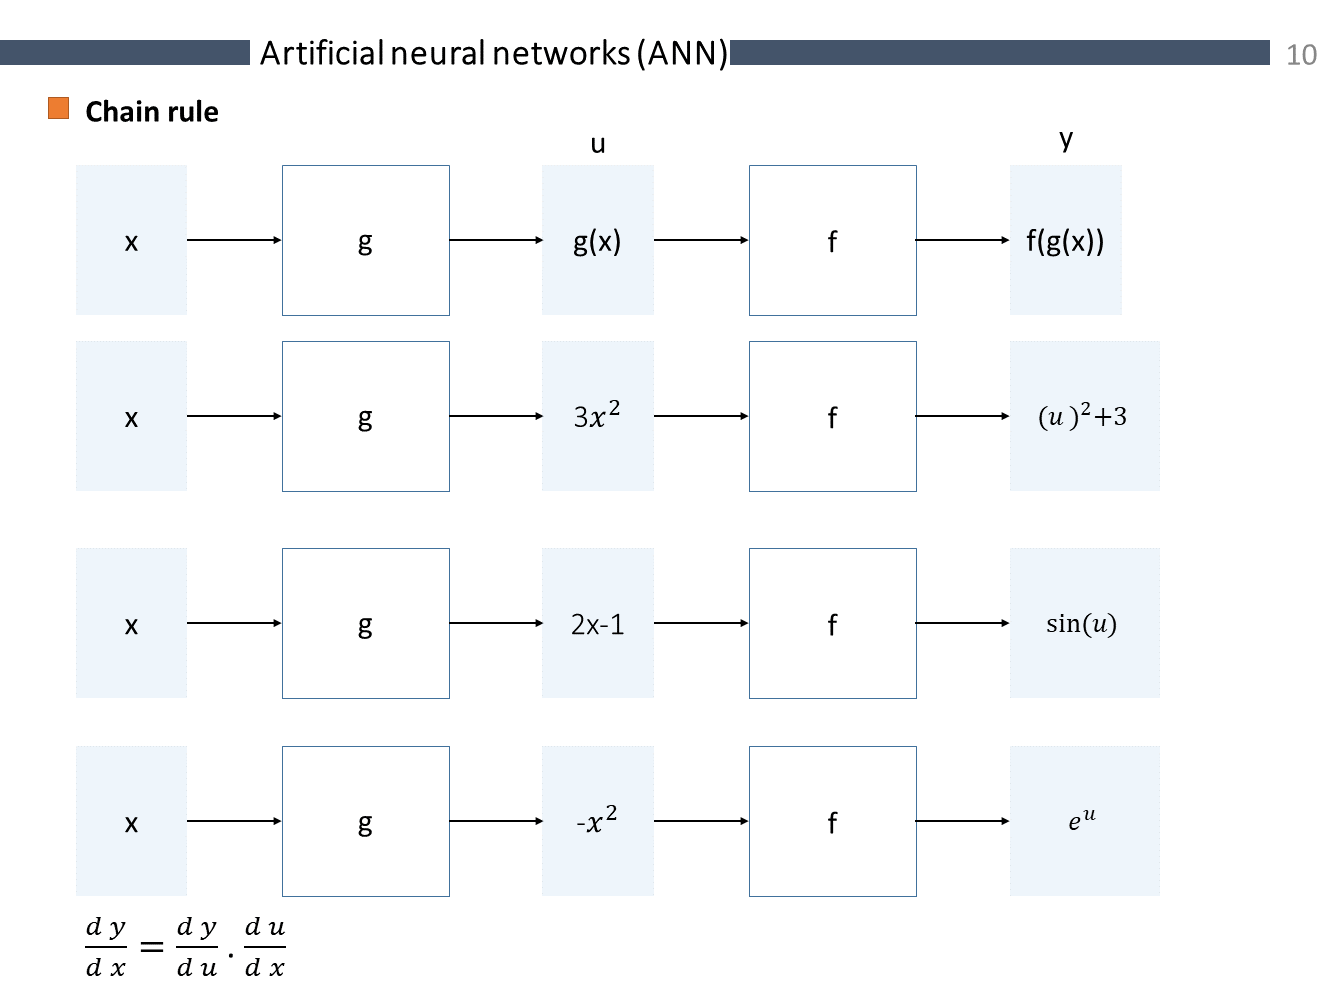

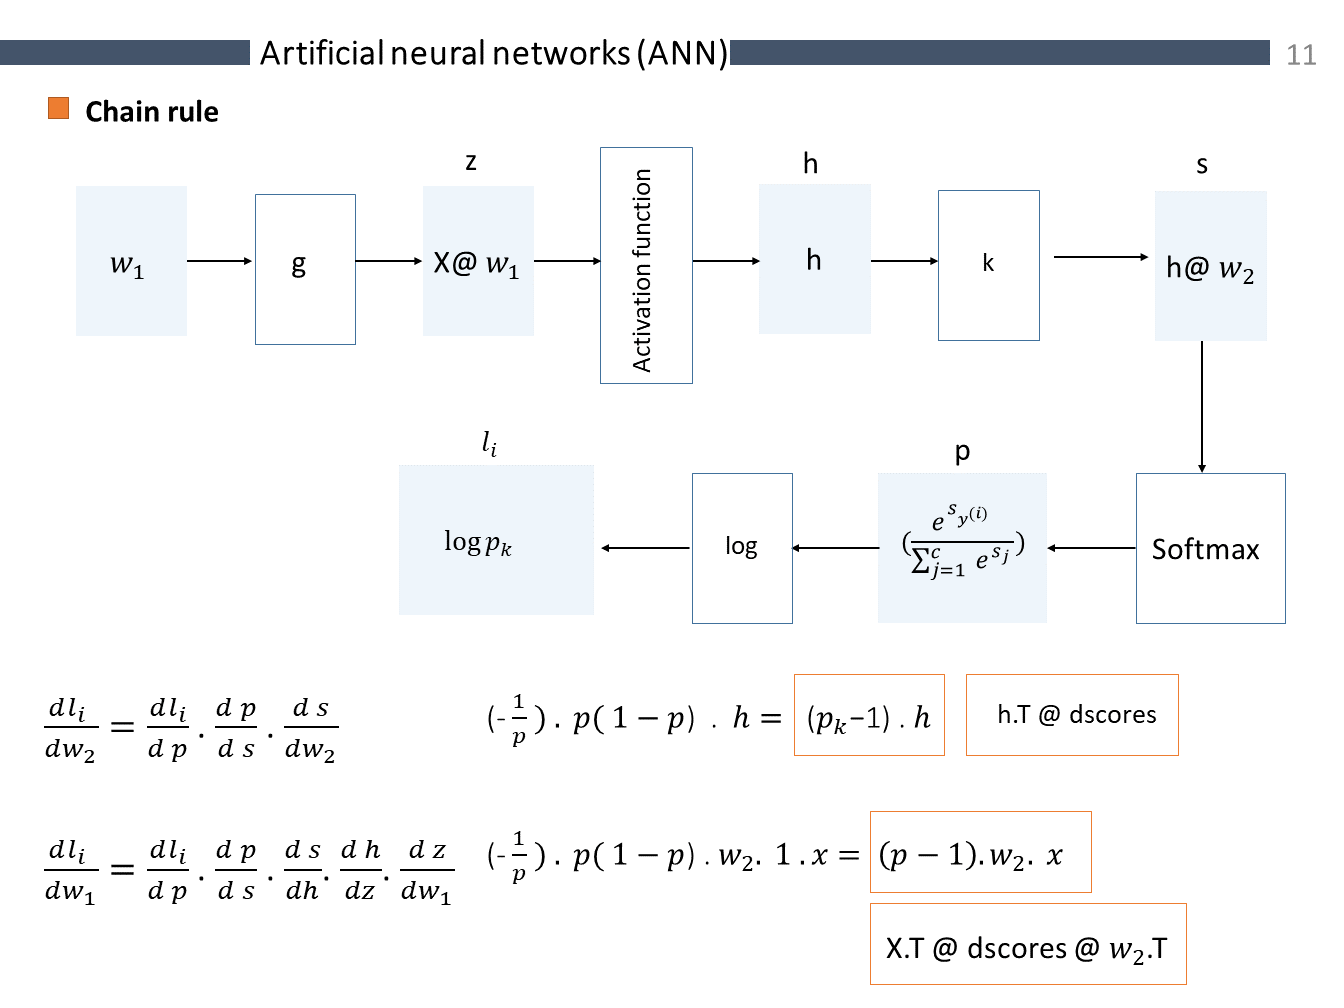

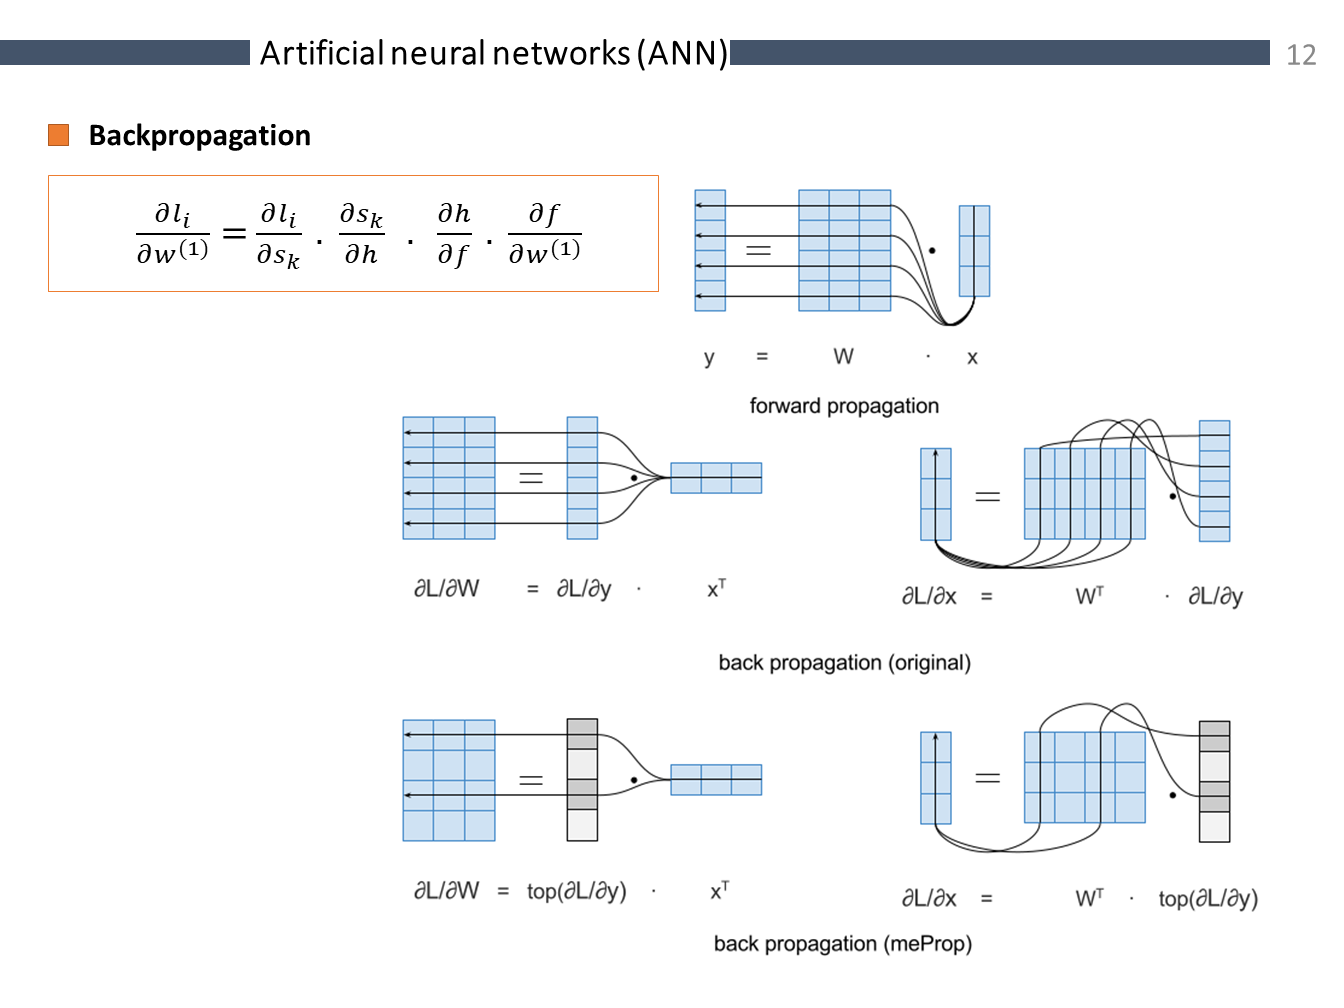

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
#from utils import softmax


def plot_random_samples(X_train, y_train, classes=None, samples_per_class=10, shape=(28, 28), figsize=(5, 4), show_titles=False):
    num_classes = len(classes)

    plt.figure(figsize=figsize)
    for y, label in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].reshape(shape), cmap=plt.cm.Greys)
            plt.axis('off')
            if i == 0 and show_titles:
                plt.title(label)
    plt.show()
    
def plot_sample(X, y, idx=None, annot=False, shape=(28, 28)):
    if idx is None:
        idx = np.random.randint(0, X.shape[0] + 1)
        
    x = X[idx].reshape(shape)
    
    figsize = (shape[0] // 2, shape[1] // 2)
    plt.figure(figsize=figsize)
    sns.heatmap(x, annot=annot, cmap=plt.cm.Greys, cbar=False)
    plt.title(y[idx])
    plt.xticks([])
    plt.yticks([])
    plt.show()
    

def plot_tsne(X, y):
    plt.figure(figsize=(14, 8))
    X_embedded = TSNE(n_components=2).fit_transform(X)
    
    cmap = plt.cm.Spectral
    for c in range(10):
        l = np.flatnonzero(c == y)
        plt.scatter(X_embedded[l, 0], X_embedded[l, 1], cmap=cmap, alpha=0.5, label="%d" %c)

    plt.xticks([])
    plt.yticks([])
    plt.legend(loc='best')
    plt.show()
    
    
def predict_and_plot(probs, x, y, mu, classes, shape=(28, 28)):    
    plt.figure(figsize=(10, 4))
    
    # plot the digit
    plt.subplot(1, 2, 1)
    x = x + mu
    plt.imshow(x.reshape(shape), interpolation='nearest', cmap=plt.cm.Greys)
    plt.xticks([])
    plt.yticks([])
    plt.title(classes[np.argmax(probs)])
    
    # plot top 5 predictions
    idx = np.argsort(probs)[5:]
    tick_label = [classes[i] for i in idx]
    color = ['g' if i == y else 'r' for i in idx]
    
    plt.subplot(1, 2, 2)
    plt.barh(range(5), width=probs[idx], tick_label=tick_label, color=color)
    plt.xlim(0, 1)
    plt.title("Top 5 predictions")
    plt.show()
    
    
def plot_confusion_matrix(y_true, y_pred, normalize=False, figsize=(12, 12)):
    cm = confusion_matrix(y_true, y_pred, labels=range(10))
    plt.figure(figsize=figsize)
    annot = cm/cm.sum(axis=1) if normalize else True
    sns.heatmap(cm, annot=annot, cmap=plt.cm.Blues, cbar=False)
    plt.title("Confusion Matrix")
    plt.show()

In [2]:
data=pd.read_csv("mnist_784_csv.csv")
data.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [6]:
X= np.array(data.drop(["class"] , axis= 1))
y=np.array(data["class"])
y
#y=y.reshape((768,1))

array([5, 0, 4, ..., 4, 5, 6], dtype=int64)

In [7]:
Xmax, Xmin = X.max(), X.min()
X = (X - Xmin)/(Xmax - Xmin)
X.shape

(70000, 784)

In [8]:
import sklearn.model_selection
X_train , X_test , y_train , y_test = sklearn.model_selection.train_test_split(X, y , test_size= 0.3)

#with gzip.open('C:/Users/Morteza/Desktop/nural_network/mnist.pkl.gz', 'rb') as f:
    #(X_train, y_train), (X_valid, y_valid), (X_test,  y_test) = pickle.load(f, encoding='latin1')

# As a sanity check, we print out the size of the data.
print('Training data shape:    ', X_train.shape)
print('Training labels shape:  ', y_train.shape)
#print('Validation data shape:  ', X_valid.shape)
#print('Validation labels shape:', y_valid.shape)
print('Test data shape:        ', X_test.shape)
print('Test labels shape:      ', y_test.shape)

Training data shape:     (49000, 784)
Training labels shape:   (49000,)
Test data shape:         (21000, 784)
Test labels shape:       (21000,)


# Visualize data

In [9]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

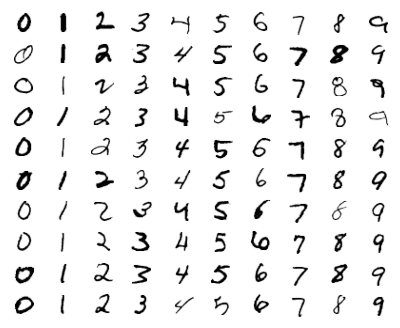

In [12]:
plot_random_samples(X_train, y_train, classes, samples_per_class=10)

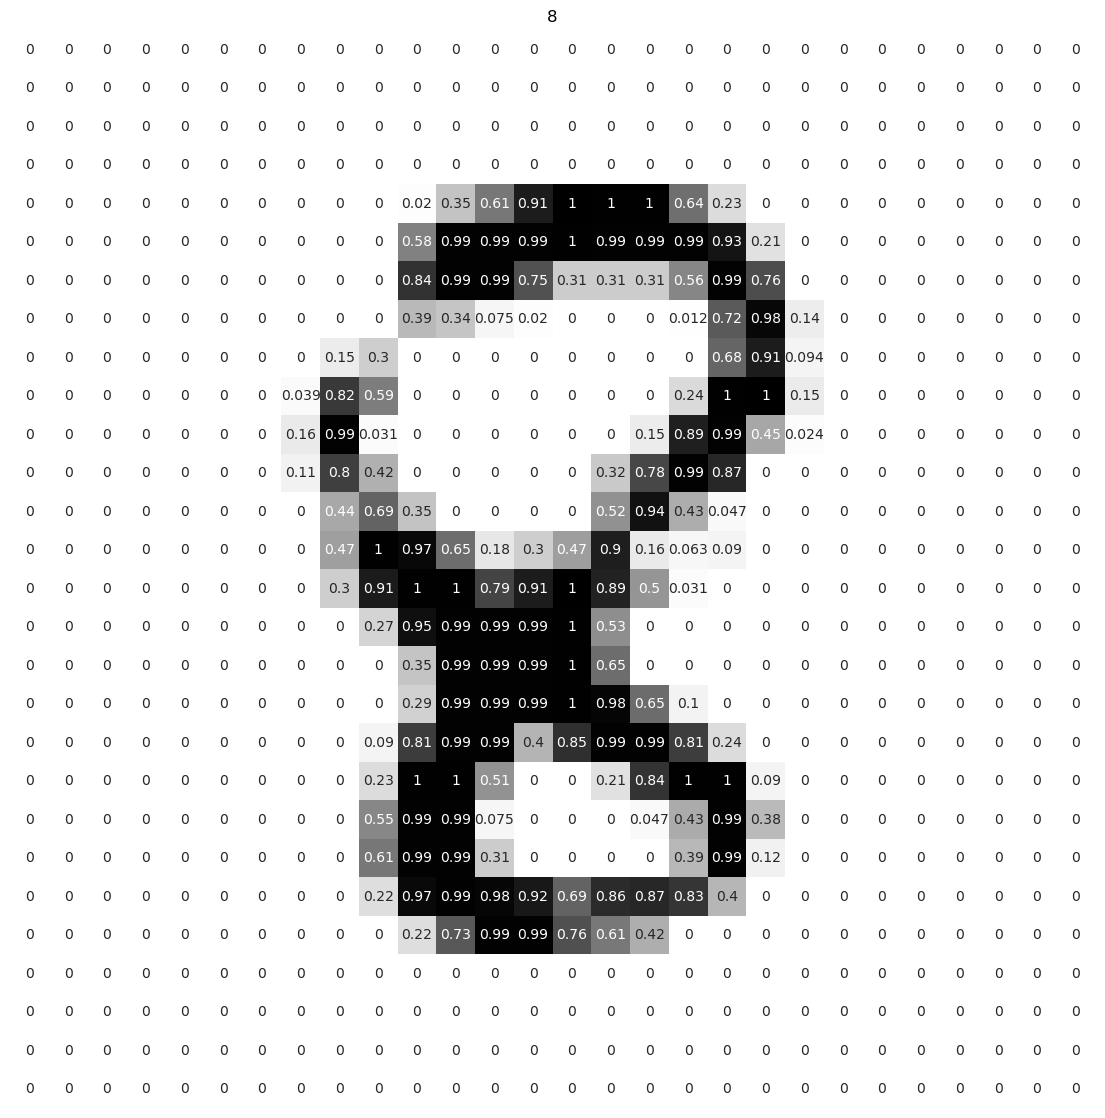

In [13]:
plot_sample(X_train, y_train, annot=True, idx=None)

In [14]:
#un=tils

import numpy as np


def accuracy(y_pred, y_true):         
    return 100. * np.mean(y_pred == y_true)


def softmax(x):
    x = x - np.max(x, axis=1, keepdims=True)
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


def softmax_loss(scores, y, mode='train'):
    m = scores.shape[0]
    probs = softmax(scores)
    loss = -np.sum(np.log(probs[range(m), y])) / m      #insted of one hot-vector
                                                        #  رینج ام یعنی عدد اول رینج با عدد اول وای (لیبل ها) و عدد دوم با عدد دوم و غیره
    
    if mode != 'train':
        return loss
    
    # backward
    dscores = probs
    dscores[range(m), y] -= 1.0                        #instead of weight derivative  badan dar x zarb mishavad
                                                       # اونایی که چزو کلاس درست هستند منهای یک می شود و اونایی که نیستن نمیشود
    dscores /= m
    
    return loss, dscores

In [ ]:
import numpy as np

x=np.array([[1,2,3,4]])
w=

In [15]:
class TwoLayerNeuralNetwork:
    
    def __init__(self, num_features=784, num_hiddens=20, num_classes=10):
        self.num_hiddens = num_hiddens
        self.num_classes = num_classes
        
        # random initialization: create random weights, set all biases to zero
        self.params = {}
        self.params['W1'] = np.random.randn(num_features, num_hiddens) * 0.001
        self.params['W2'] = np.random.randn(num_hiddens,  num_classes) * 0.001
        self.params['b1'] = np.zeros((num_hiddens,))
        self.params['b2'] = np.zeros((num_classes,))
        
    def forward(self, X):
        # forward step
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        
        # forward step
        h_in = X @ W1 + b1       # hidden layer input
        h = np.maximum(0, h_in)  # hidden layer output (using ReLU)
        scores = h @ W2 + b2     # neural net output
        
        return scores
                            
    def train_step(self, X, y):
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        
        # forward step
        h_in = X @ W1 + b1       # hidden layer input
        h = np.maximum(0, h_in)  # hidden layer output (using ReLU)
        scores = h @ W2 + b2     # neural net output
        
        # compute loss
        loss, dscores = softmax_loss(scores, y)               #dscores = derivatives of scores
        
        # backward step
        db2 = dscores.sum(axis=0)
        dW2 = h.T @ dscores
        
        dh = dscores @ W2.T
        dh[h_in < 0] = 0.0
        
        db1 = dh.sum(axis=0)
        dW1 = X.T @ dh
        
        gradient = {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2}
                
        return loss, gradient
        
    def train(self, X_train, y_train, X_valid, y_valid, batch_size=50, 
              alpha=0.001, lmbda=0.0001, num_epochs=10):
        
        m, n = X_train.shape        
        num_batches = m // batch_size
        
        report = "{:3d}: training loss = {:.2f} | validation loss = {:.2f}"
        
        losses = []
        for epoch in range(num_epochs):
            train_loss = 0.0
            
            for _ in range(num_batches):
                W1, b1 = self.params['W1'], self.params['b1']
                W2, b2 = self.params['W2'], self.params['b2']
                
                # select a random mini-batch
                batch_idx = np.random.choice(m, batch_size, replace=False)
                X_batch, y_batch = X_train[batch_idx], y_train[batch_idx]

                # train on mini-batch
                data_loss, gradient = self.train_step(X_batch, y_batch)
                reg_loss = 0.5 * (np.sum(W1 ** 2) + np.sum(W2 ** 2))
                train_loss += (data_loss + lmbda * reg_loss)
                losses.append(data_loss + lmbda * reg_loss)

                # regularization
                gradient['W1'] += lmbda * W1
                gradient['W2'] += lmbda * W2

                # update parameters
                for p in self.params:
                    self.params[p] = self.params[p] - alpha * gradient[p]
            
            # report training loss and validation loss
            train_loss /= num_batches
            valid_loss = softmax_loss(self.forward(X_valid), y_valid, mode='test')
            print(report.format(epoch + 1, train_loss, valid_loss))
        
        return losses
    
    def predict(self, X):
        """ Predict labels for input data.
        """
        scores = self.forward(X)
        return np.argmax(scores, axis=1)
    
    def predict_proba(self, X):
        """ Predict probabilties of classes for each input data.
        """
        scores = self.forward(X)
        return softmax(scores)

In [20]:
mlp = TwoLayerNeuralNetwork(num_hiddens=20)
mlp.train_step(X_train, y_train)[0]

2.3025838626747266

In [21]:
train_acc = accuracy(mlp.predict(X_train), y_train)
print("Training accuracy   = {:.2f}%".format(train_acc))

test_acc = accuracy(mlp.predict(X_test), y_test)
print("Validation accuracy = {:.2f}%".format(test_acc))

Training accuracy   = 13.88%
Validation accuracy = 13.88%


plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, 10001, 1000), range(0, 11))
plt.show()

In [23]:
test_acc = accuracy(predict(W, b, X_test), y_test)
print('Test accuracy = {:.2f}%'.format(train_acc))

NameError: name 'predict' is not defined

In [25]:
for i in range(10):
    idx = np.random.choice(len(y_test))
    probs = mlp.predict_proba(X_test[idx].reshape((1, -1)))[0]
    predict_and_plot(probs, X_test[idx], y_test[idx], mu, classes)

NameError: name 'mu' is not defined

In [27]:
count = 10
y_pred = mlp.predict(X_test)
idx = np.flatnonzero(y_pred != y_test)
sample_idx = np.random.choice(idx, count)

for i in sample_idx:
    probs = mlp.predict_proba(X_test[i].reshape((1, -1)))[0]
    predict_and_plot(probs, X_test[i], y_test[i], mu, classes)

NameError: name 'mu' is not defined

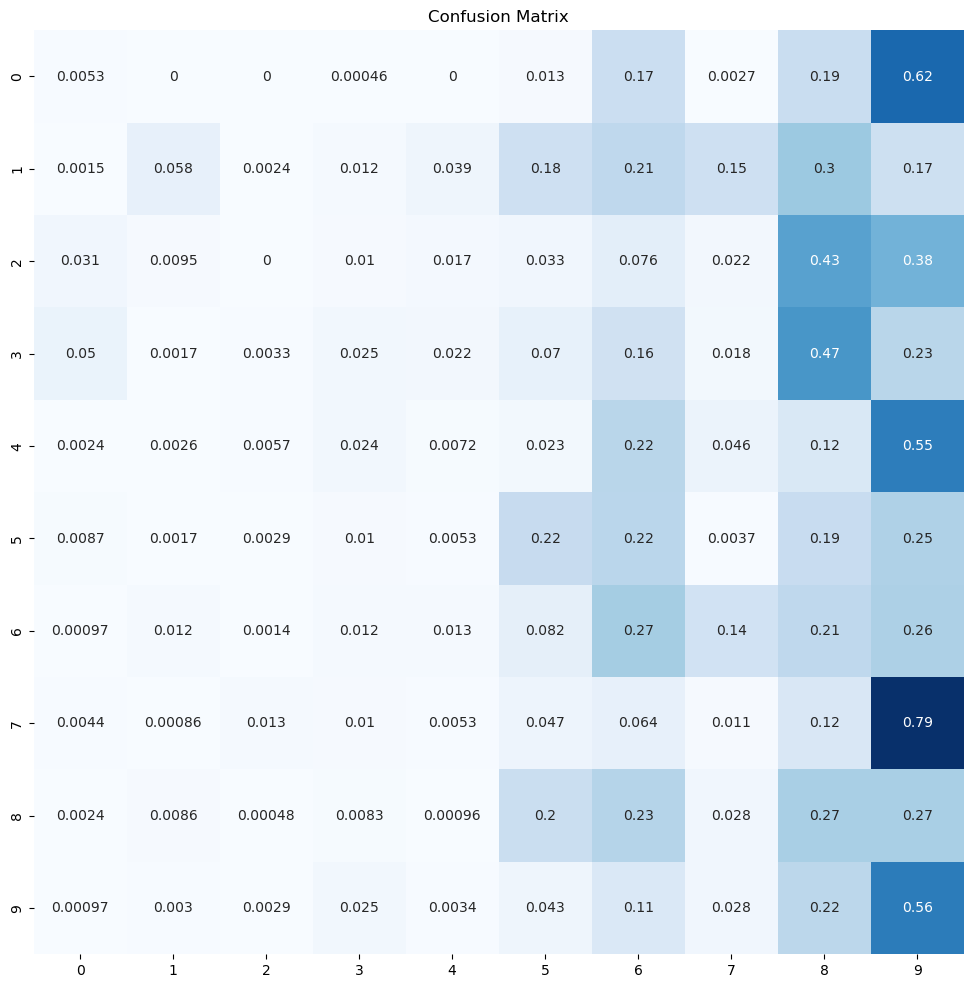

In [28]:
y_pred = mlp.predict(X_test)
plot_confusion_matrix(y_test, y_pred, normalize=True)

In [29]:
W = mlp.params['W1']
print(W.shape)

(784, 20)


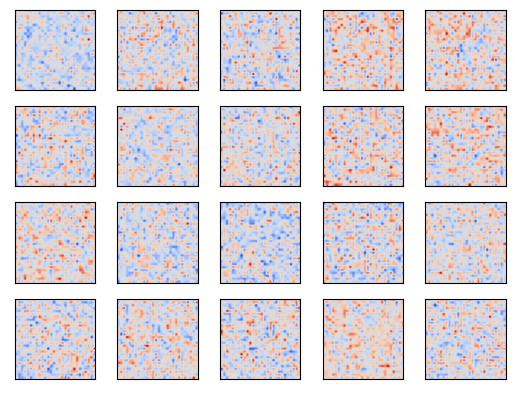

In [30]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(W[:, i].reshape((28, 28)), cmap=plt.cm.coolwarm)
    plt.xticks([])
    plt.yticks([])
plt.show()

# Neural networks in scikit learn

In [32]:
from sklearn.neural_network import MLPClassifier

In [46]:
model = MLPClassifier(hidden_layer_sizes=(20,), learning_rate='adaptive', alpha=0.1, max_iter=50, verbose=1)
model.fit(X_train, y_train);

Iteration 1, loss = 0.80624563
Iteration 2, loss = 0.34919202
Iteration 3, loss = 0.29836797
Iteration 4, loss = 0.27284286
Iteration 5, loss = 0.25640181
Iteration 6, loss = 0.24618257
Iteration 7, loss = 0.23709497
Iteration 8, loss = 0.23096737
Iteration 9, loss = 0.22504748
Iteration 10, loss = 0.21977788
Iteration 11, loss = 0.21596977
Iteration 12, loss = 0.21167477
Iteration 13, loss = 0.20831467
Iteration 14, loss = 0.20579310
Iteration 15, loss = 0.20254334
Iteration 16, loss = 0.19909344
Iteration 17, loss = 0.19708198
Iteration 18, loss = 0.19403687
Iteration 19, loss = 0.19137089
Iteration 20, loss = 0.18963695
Iteration 21, loss = 0.18709048
Iteration 22, loss = 0.18541917
Iteration 23, loss = 0.18312085
Iteration 24, loss = 0.18150380
Iteration 25, loss = 0.17922510
Iteration 26, loss = 0.17799070
Iteration 27, loss = 0.17642158
Iteration 28, loss = 0.17465995
Iteration 29, loss = 0.17422555
Iteration 30, loss = 0.17193226
Iteration 31, loss = 0.17128832
Iteration 32, los

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
train_acc = model.score(X_train, y_train)
print("Train accuracy = {:.2f}%".format(train_acc * 100))

test_acc = model.score(X_test, y_test)
print("Test accuracy  = {:.2f}%".format(test_acc * 100))

Train accuracy = 97.28%
Test accuracy  = 95.37%
